# Predicting Video Games Sales

### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Dataset

#### Dataset Source - [Kaggle - Video_Games_Sales_as_at_22_Dec_2016](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

In [2]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Size of Dataset

In [4]:
df.shape

(16719, 16)

### Total Columns

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

### Count of NULL values in each column

In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### Each game has separate characteristics so dropping the null values is only option

In [7]:
df1 = df.dropna()

In [8]:
df1.shape

(6825, 16)

In [9]:
df1.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### Correlation Heatmap 

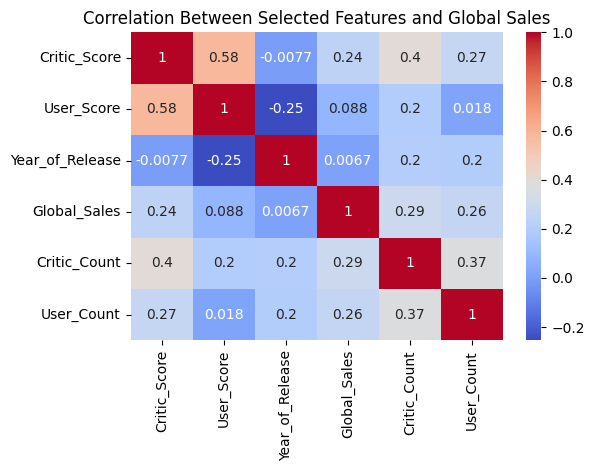

In [10]:
cols = ['Critic_Score', 'User_Score', 'Year_of_Release', 'Global_Sales',"Critic_Count","User_Count"]


corr_selected = df1[cols].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm')
plt.title("Correlation Between Selected Features and Global Sales")
plt.show()


### Unique Values

In [11]:
for col in df1.select_dtypes(include='object').columns:
    print(f"'{col}': {df1[col].nunique()} unique values")

'Name': 4377 unique values
'Platform': 17 unique values
'Genre': 12 unique values
'Publisher': 263 unique values
'Developer': 1289 unique values
'Rating': 7 unique values


In [12]:
publisher_sales = df1.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)


tier_size = len(publisher_sales) // 10
publisher_tiers = {}
publisher_sales

Publisher
Electronic Arts                868.55
Nintendo                       849.49
Activision                     535.74
Sony Computer Entertainment    388.10
Take-Two Interactive           350.17
                                ...  
Encore                           0.01
Lighthouse Interactive           0.01
NewKidCo                         0.01
CDV Software Entertainment       0.01
Blue Byte                        0.01
Name: Global_Sales, Length: 263, dtype: float64

In [13]:

for i in range(10):
    start = i * tier_size
    end = (i + 1) * tier_size if i < 9 else len(publisher_sales)
    tier_publishers = publisher_sales.iloc[start:end].index
    for publisher in tier_publishers:
        publisher_tiers[publisher] = f'Tier_{i+1}'


df1['Publisher_Tier'] = df1['Publisher'].map(publisher_tiers)


C:\Users\soham\AppData\Local\Temp\ipykernel_10040\1132347769.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Publisher_Tier'] = df1['Publisher'].map(publisher_tiers)


In [14]:

developer_sales = df1.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False)


tier_size = len(developer_sales) // 10
developer_tiers = {}

for i in range(10):
    start = i * tier_size
    end = (i + 1) * tier_size if i < 9 else len(developer_sales)
    tier_devs = developer_sales.iloc[start:end].index
    for dev in tier_devs:
        developer_tiers[dev] = f'Tier_{i+1}'

df1['Developer_Tier'] = df1['Developer'].map(developer_tiers)


C:\Users\soham\AppData\Local\Temp\ipykernel_10040\1714200769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Developer_Tier'] = df1['Developer'].map(developer_tiers)


In [15]:
developer_sales

Developer
Nintendo                           529.90
EA Sports                          145.93
EA Canada                          131.46
Rockstar North                     119.47
Capcom                             114.52
                                    ...  
Tecmo, Graphic Research              0.01
Battlefront.com, 1C, 1C Company      0.01
Boston Animation                     0.01
King of the Jungle                   0.01
Katauri Interactive                  0.01
Name: Global_Sales, Length: 1289, dtype: float64

In [16]:
df1.shape

(6825, 18)

In [17]:
df1[["Publisher_Tier", "Developer_Tier"]].head(10)

,Publisher_Tier,Developer_Tier
0,Tier_1,Tier_1
2,Tier_1,Tier_1
3,Tier_1,Tier_1
6,Tier_1,Tier_1
7,Tier_1,Tier_1
8,Tier_1,Tier_1
11,Tier_1,Tier_1
13,Tier_1,Tier_1
14,Tier_1,Tier_1
15,Tier_1,Tier_1


### Plotting the distribution of Games amoung Developers and Publishers

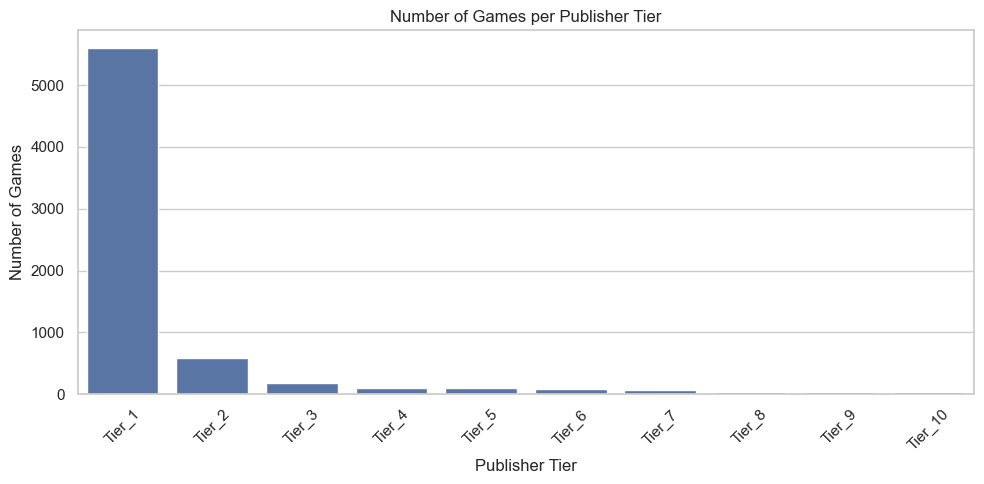

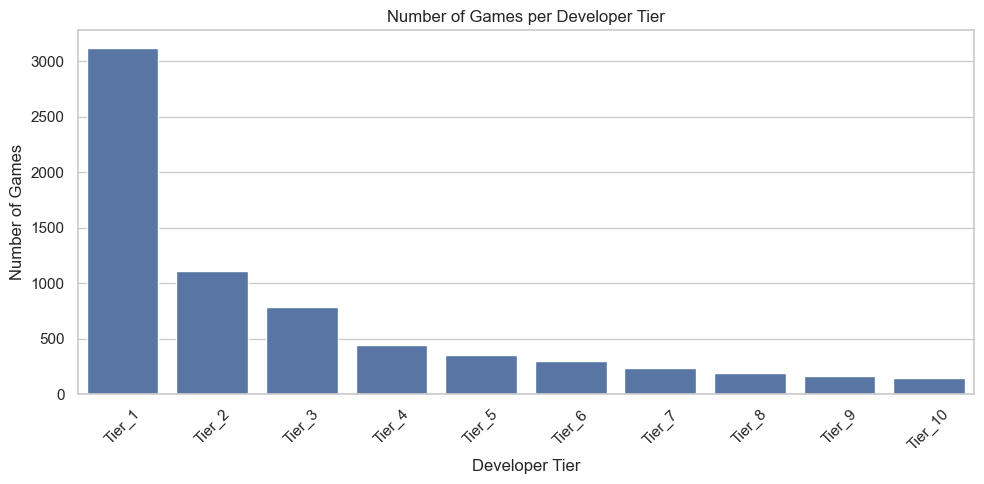

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='Publisher_Tier')
plt.title('Number of Games per Publisher Tier')
plt.xlabel('Publisher Tier')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='Developer_Tier')
plt.title('Number of Games per Developer Tier')
plt.xlabel('Developer Tier')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
tier_mapping = {
    'Tier_1': 1,
    'Tier_2': 2,
    'Tier_3': 3,
    'Tier_4': 4,
    'Tier_5': 5,
    'Tier_6': 6,
    'Tier_7': 7,
    'Tier_8': 8,
    'Tier_9': 9,
    'Tier_10': 10
}

df1['Publisher_Tier'] = df1['Publisher_Tier'].map(tier_mapping)
df1['Developer_Tier'] = df1['Developer_Tier'].map(tier_mapping)


C:\Users\soham\AppData\Local\Temp\ipykernel_10040\2587285591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Publisher_Tier'] = df1['Publisher_Tier'].map(tier_mapping)
C:\Users\soham\AppData\Local\Temp\ipykernel_10040\2587285591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Developer_Tier'] = df1['Developer_Tier'].map(tier_mapping)


In [20]:
df1.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Publisher_Tier       int64
Developer_Tier       int64
dtype: object

In [21]:
print("Unique values in Platform:", df1["Platform"].unique())
print("Unique values in Genre:", df1["Genre"].unique())

Unique values in Platform: ['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']
Unique values in Genre: ['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


C:\Users\soham\AppData\Local\Temp\ipykernel_10040\3251303349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, y='Platform', order=df1['Platform'].value_counts().index, palette="viridis")


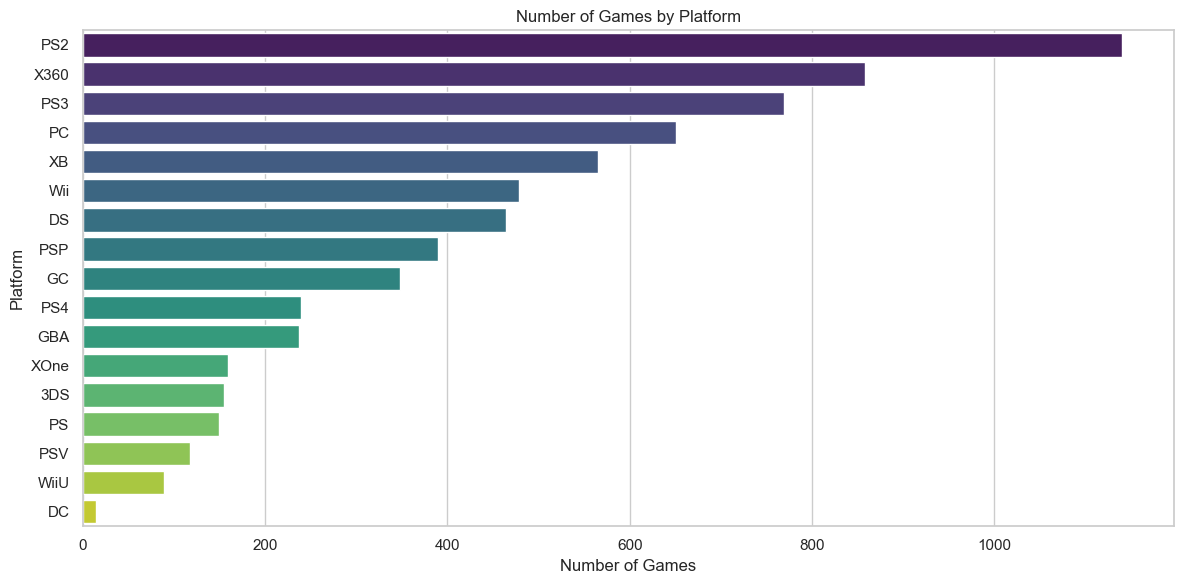

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, y='Platform', order=df1['Platform'].value_counts().index, palette="viridis")
plt.title("Number of Games by Platform")
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()


C:\Users\soham\AppData\Local\Temp\ipykernel_10040\4135689785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Genre', order=df1['Genre'].value_counts().index, palette="viridis")


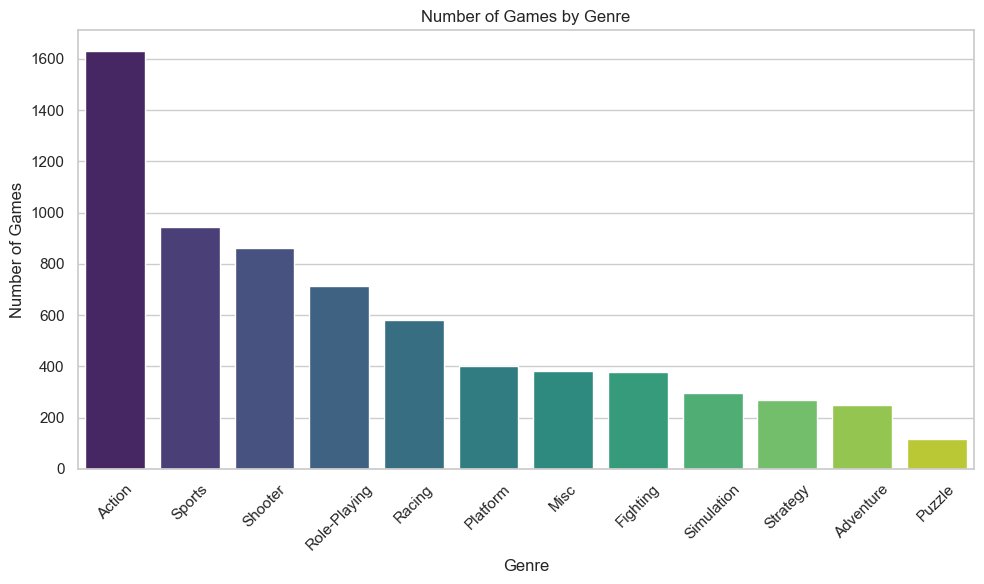

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Genre', order=df1['Genre'].value_counts().index, palette="viridis")
plt.title("Number of Games by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### One-Hot Encoding

In [24]:
df1 = pd.get_dummies(df1, columns=["Platform", "Genre"], drop_first=True)

In [25]:
df1["Rating"].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

### Ordinal Encoding

In [26]:
rating_map = {
    'K-A': 1,
    'E': 2,
    'E10+': 3,
    'T': 4,
    'M': 5,
    'AO': 6,
    'RP': 0 
}

df1['Rating_Encoded'] = df1['Rating'].map(rating_map)


### Datatypes of columns present

In [27]:
df1.dtypes

Name                   object
Year_of_Release       float64
Publisher              object
NA_Sales              float64
EU_Sales              float64
JP_Sales              float64
Other_Sales           float64
Global_Sales          float64
Critic_Score          float64
Critic_Count          float64
User_Score            float64
User_Count            float64
Developer              object
Rating                 object
Publisher_Tier          int64
Developer_Tier          int64
Platform_DC              bool
Platform_DS              bool
Platform_GBA             bool
Platform_GC              bool
Platform_PC              bool
Platform_PS              bool
Platform_PS2             bool
Platform_PS3             bool
Platform_PS4             bool
Platform_PSP             bool
Platform_PSV             bool
Platform_Wii             bool
Platform_WiiU            bool
Platform_X360            bool
Platform_XB              bool
Platform_XOne            bool
Genre_Adventure          bool
Genre_Figh

### Correlation Heatmap 

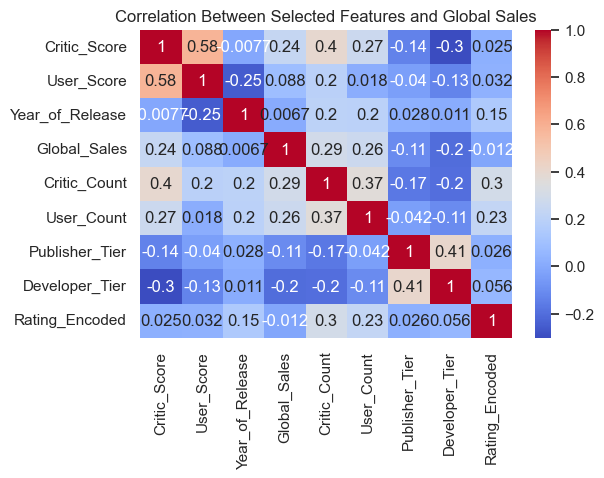

In [28]:


cols = ['Critic_Score', 'User_Score', 'Year_of_Release', 'Global_Sales',"Critic_Count","User_Count","Publisher_Tier","Developer_Tier","Rating_Encoded"]


corr_selected = df1[cols].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm')
plt.title("Correlation Between Selected Features and Global Sales")
plt.show()


### Dropping Unnecessary columns

In [29]:
df1 = df1.drop(columns=["Name","Year_of_Release","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Developer","Rating"])

In [30]:
df1.isnull().sum()

Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Publisher_Tier        0
Developer_Tier        0
Platform_DC           0
Platform_DS           0
Platform_GBA          0
Platform_GC           0
Platform_PC           0
Platform_PS           0
Platform_PS2          0
Platform_PS3          0
Platform_PS4          0
Platform_PSP          0
Platform_PSV          0
Platform_Wii          0
Platform_WiiU         0
Platform_X360         0
Platform_XB           0
Platform_XOne         0
Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role-Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
Rating_Encoded        0
dtype: int64

In [31]:
X = df1.drop(columns=['Global_Sales'])
y = df1['Global_Sales']


### train test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.columns

Index(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Publisher_Tier', 'Developer_Tier', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_Encoded'],
      dtype='object')

### LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)


print("=== Linear Regression ===")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


=== Linear Regression ===
R² Score: 0.2836264285717013
MSE: 1.946861111013897
MAE: 0.709174990009108


### RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor



rf_model = RandomForestRegressor(random_state=42)


rf_model.fit(X_train, y_train)


rf_preds = rf_model.predict(X_test)

r2_RF = r2_score(y_test, rf_preds)


print("=== Random Forest Regressor ===")
print("R² Score:", r2_score(y_test, rf_preds))
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("RMSE:", mean_squared_error(y_test, rf_preds) ** 0.5)



=== Random Forest Regressor ===
R² Score: 0.4358546869357469
MAE: 0.5005218937728938
MSE: 1.5331561838270351
RMSE: 1.2382068421015267


### GradientBoostingRegressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(random_state=42)


gb_model.fit(X_train, y_train)


gb_preds = gb_model.predict(X_test)

r2_GB = r2_score(y_test, gb_preds)

print("=== Gradient Boosting Regressor ===")
print("R² Score:", r2_score(y_test, gb_preds))
print("MAE:", mean_absolute_error(y_test, gb_preds))
print("MSE:", mean_squared_error(y_test, gb_preds))
print("RMSE:", mean_squared_error(y_test, gb_preds) ** 0.5)

=== Gradient Boosting Regressor ===
R² Score: 0.41346199912558346
MAE: 0.5226794029626416
MSE: 1.5940119367573982
RMSE: 1.2625418554477306


### Plotting R2 scores

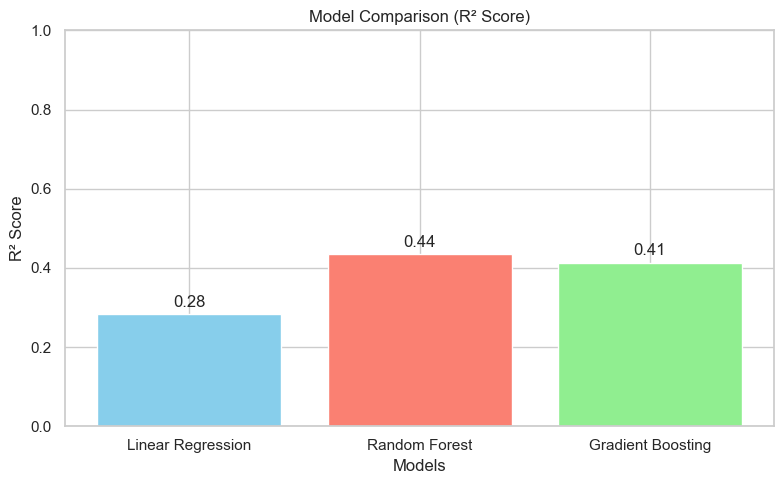

In [37]:
import matplotlib.pyplot as plt


variables = ['Linear Regression','Random Forest',"Gradient Boosting"]
scores = [r2_lr, r2_RF, r2_GB]  

plt.figure(figsize=(8, 5))
bars = plt.bar(variables, scores, color=['skyblue', 'salmon', 'lightgreen'])

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison (R² Score)')
plt.ylim(0, 1)


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Going With Classification Approach

### Classifying the sales into categories

In [38]:

bins = [0, 0.5, 1, 5, 20, 100]
labels = [
    '0-500K', '500K-1M', '1-5M', '5-20M', '20M+'
]



df1['Sales_Category'] = pd.cut(df1['Global_Sales'], bins=bins, labels=labels, right=False)


print(df1['Sales_Category'].value_counts())


Sales_Category
0-500K     4365
1-5M       1170
500K-1M    1147
5-20M       130
20M+         13
Name: count, dtype: int64


In [39]:
df1[["Global_Sales", "Sales_Category"]].head(10)

,Global_Sales,Sales_Category
0,82.53,20M+
2,35.52,20M+
3,32.77,20M+
6,29.80,20M+
7,28.92,20M+
8,28.32,20M+
11,23.21,20M+
13,22.70,20M+
14,21.81,20M+
15,21.79,20M+


### Distribution

C:\Users\soham\AppData\Local\Temp\ipykernel_10040\1162121342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df1, x='Sales_Category', palette='viridis', order=labels)


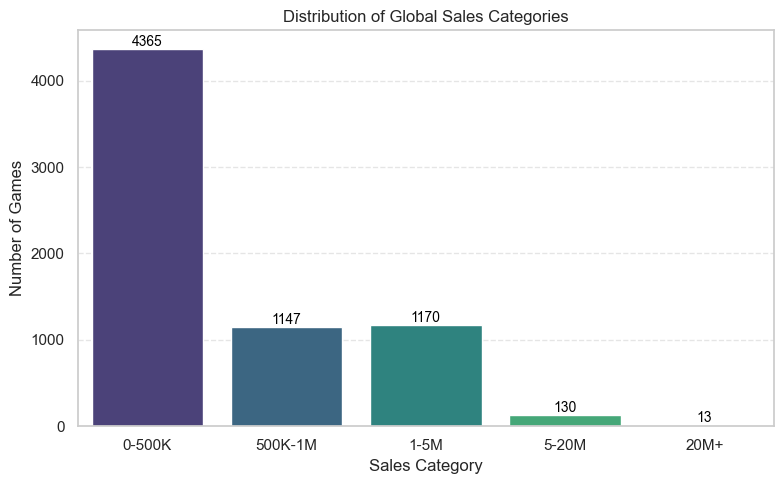

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df1, x='Sales_Category', palette='viridis', order=labels)
plt.title('Distribution of Global Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Number of Games')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### train test split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

X = df1.drop(columns = ['Sales_Category','Global_Sales'])
y = df1['Sales_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
X_train.columns

Index(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Publisher_Tier', 'Developer_Tier', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_Encoded'],
      dtype='object')

### LogisticRegression

=== Logistic regression ===
Accuracy: 0.6981684981684981
Classification Report:
               precision    recall  f1-score   support

      0-500K       0.75      0.95      0.83       854
        1-5M       0.52      0.56      0.54       236
        20M+       0.00      0.00      0.00         1
       5-20M       0.57      0.13      0.22        30
     500K-1M       0.42      0.03      0.06       244

    accuracy                           0.70      1365
   macro avg       0.45      0.33      0.33      1365
weighted avg       0.64      0.70      0.63      1365



C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: P

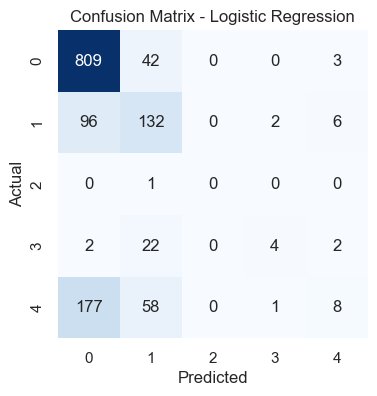

In [43]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


log_reg = LogisticRegression(max_iter=1000)  

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)
y_probs = log_reg.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)



print("=== Logistic regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

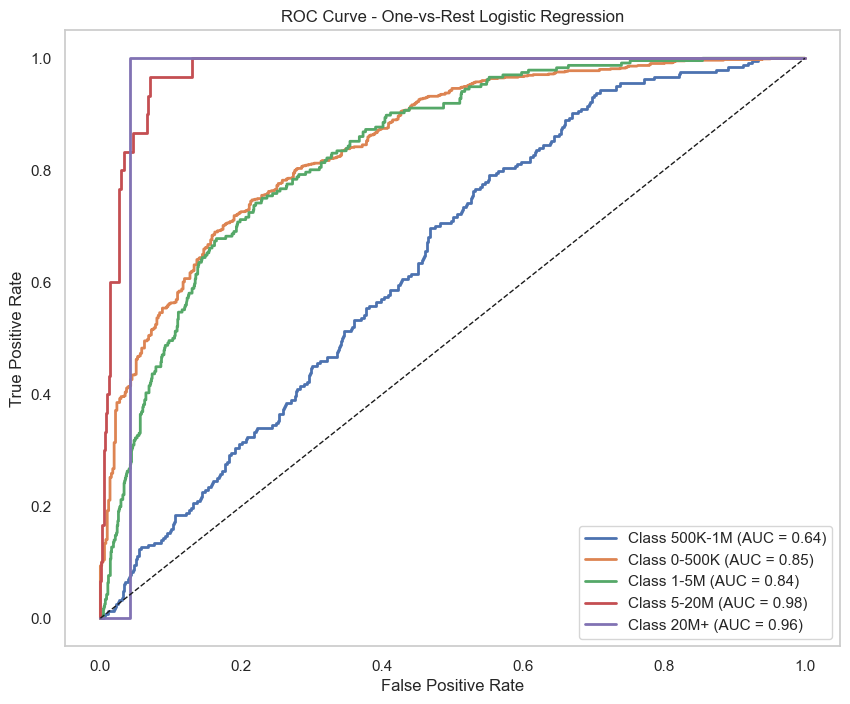

In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


classes = y_train.unique()
y_test_bin = label_binarize(y_test, classes=classes)

classifier = OneVsRestClassifier(LogisticRegression(max_iter=100))
classifier.fit(X_train, label_binarize(y_train, classes=classes))
y_score = classifier.predict_proba(X_test)


plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### DecisionTreeClassifier

=== Decision Tree ===
Accuracy: 0.6336996336996337
Classification Report:
              precision    recall  f1-score   support

      0-500K       0.81      0.80      0.80       854
        1-5M       0.42      0.42      0.42       236
        20M+       0.00      0.00      0.00         1
       5-20M       0.45      0.47      0.46        30
     500K-1M       0.28      0.28      0.28       244

    accuracy                           0.63      1365
   macro avg       0.39      0.39      0.39      1365
weighted avg       0.64      0.63      0.63      1365



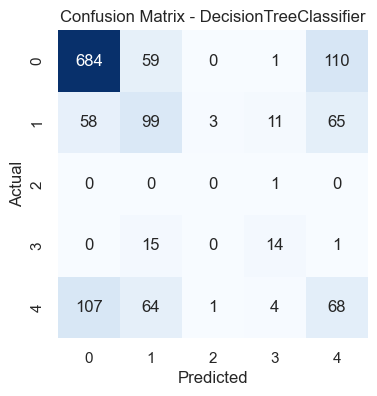

In [45]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


dt_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, dt_pred)
y_probs = dt_model.predict_proba(X_test)[:, 1]

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:")
print(classification_report(y_test, dt_pred))


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - DecisionTreeClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



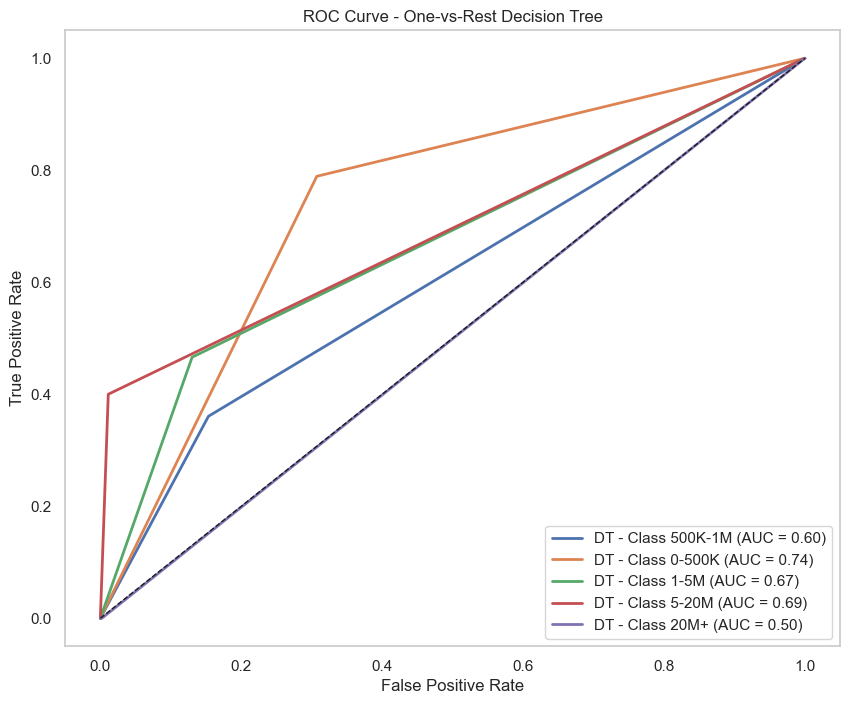

In [46]:
from sklearn.tree import DecisionTreeClassifier


classes = y_train.unique()
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)


dt_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
dt_classifier.fit(X_train, y_train_bin)
y_score_dt = dt_classifier.predict_proba(X_test)


plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'DT - Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### RandomForestClassifier

=== Random Forest ===
Accuracy: 0.7304029304029304
Classification Report:
              precision    recall  f1-score   support

      0-500K       0.78      0.94      0.85       854
        1-5M       0.60      0.62      0.61       236
        20M+       0.00      0.00      0.00         1
       5-20M       0.79      0.37      0.50        30
     500K-1M       0.47      0.16      0.24       244

    accuracy                           0.73      1365
   macro avg       0.53      0.42      0.44      1365
weighted avg       0.69      0.73      0.69      1365



C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

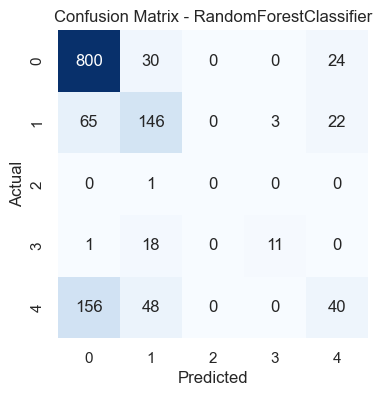

In [47]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)



print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))


cm = confusion_matrix(y_test, rf_pred)
y_probs = rf_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


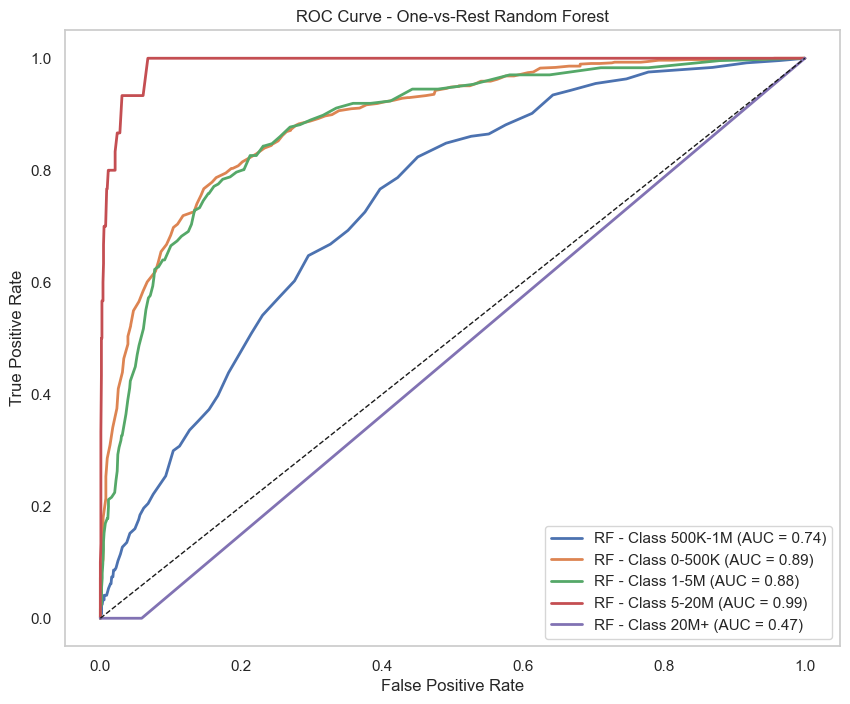

In [48]:
from sklearn.ensemble import RandomForestClassifier

 
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train, y_train_bin)
y_score_rf = rf_classifier.predict_proba(X_test)


plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'RF - Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Model Accuracy Comparisons

C:\Users\soham\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


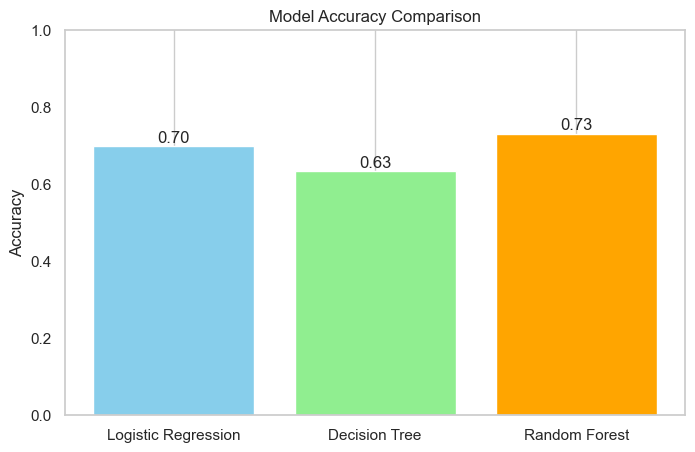

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc


plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.grid(axis='y')
plt.show()


### ✅ Conclusion

In this project, the original task was a **regression problem** where the goal was to predict the exact global sales figures for video games. However, I converted it into a **classification problem** by grouping sales into realistic categories like `0-500K`, `500K-1M`, `1-5M`, etc.

---

#### 🎯 Why was this conversion done?

- **Real-world practicality:** In the gaming industry, the focus is usually on the **sales category**, not the exact number. For example, stakeholders are more interested in whether a game sold over 1 million copies rather than if it sold exactly 1,234,567 units.
- **Interpretability:** Classification makes it easier to interpret and communicate model results using **accuracy**, **precision**, **recall**, and **ROC curves**.
- **Business alignment:** Game publishers and decision-makers often use these categories for making **marketing**, **investment**, and **strategy decisions**.
- **Robustness:** Predicting ranges is also less sensitive to outliers compared to exact numbers in regression.

---

#### 📌 Final Takeaway:

While regression gives numeric predictions, converting it into classification provided a **more realistic**, **business-friendly**, and **actionable** view of the data — making it a better fit for the real world.

